In [23]:
import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import tensorflow as tf
from tensorflow.keras.regularizers import l2

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 10
BATCH_SIZE = 10
reg = l2(5e-4)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)

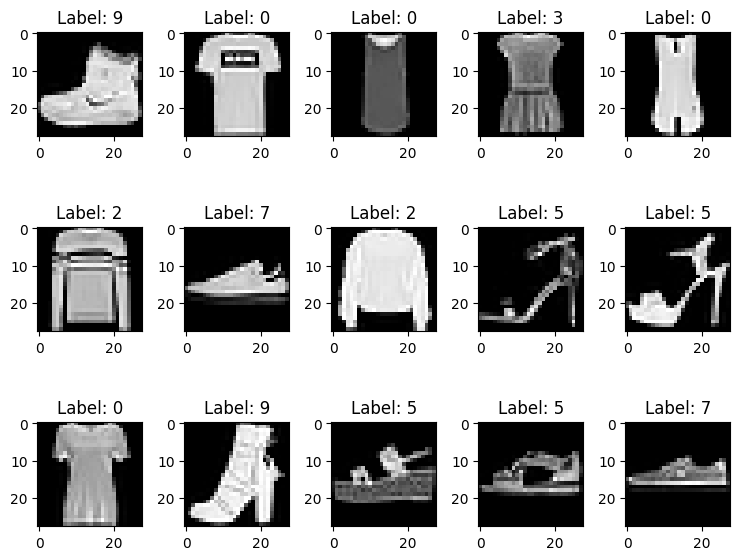

In [4]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# Model 1

In [7]:
# Model
model = tf.keras.Sequential()
# Add convolution 2D
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=reg))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax',kernel_regularizer=reg))


model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=1e-4, momentum=0.8),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
                  batch_size=10,
                  epochs=10,
                  verbose=1,
                  validation_data=(x_test, y_test))

Epoch 1/10


2023-06-12 01:30:48.864807: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6000/6000 [==============================] - 37s 6ms/step - loss: 3.7008 - accuracy: 0.6546 - val_loss: 0.8587 - val_accuracy: 0.7002
Epoch 2/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.9215 - accuracy: 0.7231 - val_loss: 0.7676 - val_accuracy: 0.7445
Epoch 3/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.8894 - accuracy: 0.7335 - val_loss: 0.7832 - val_accuracy: 0.7373
Epoch 4/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.8815 - accuracy: 0.7412 - val_loss: 0.7565 - val_accuracy: 0.7586
Epoch 5/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.8707 - accuracy: 0.7507 - val_loss: 0.7177 - val_accuracy: 0.7812
Epoch 6/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.8573 - accuracy: 0.7588 - val_loss: 0.7727 - val_accuracy: 0.7709
Epoch 7/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.8510 - accuracy: 0.7687 - val_loss: 0.7596 - val_accuracy: 0.7

In [10]:
model.evaluate(x_test, y_test, batch_size=10)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.7594 - accuracy: 0.8100


[0.759448766708374, 0.8100000023841858]

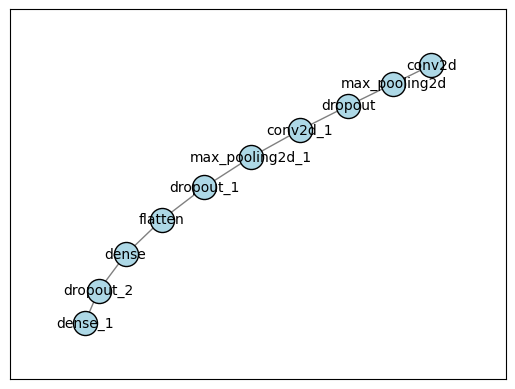

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add input layer separately
input_layer = model.layers[0]
G.add_node(input_layer.name)

# Add the remaining layers
for layer in model.layers[1:]:
    G.add_node(layer.name)

# Add edges between layers
for layer in model.layers[1:]:
    inbound_layers = layer._inbound_nodes[0].inbound_layers
    if isinstance(inbound_layers, list):
        for inbound_layer in inbound_layers:
            G.add_edge(inbound_layer.name, layer.name)
    else:
        G.add_edge(inbound_layers.name, layer.name)

# Customize node and edge colors
node_color = 'lightblue'
edge_color = 'gray'

# Set node positions using a spring layout
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_color, edgecolors='black')
nx.draw_networkx_edges(G, pos, edge_color=edge_color)

# Add node labels
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Adjust plot margins
ax = plt.gca()
ax.margins(0.15)

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

# Model 2

In [25]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 10
BATCH_SIZE = 10
reg = l2(1e-4)

In [11]:
# Model
model2 = tf.keras.Sequential()
# Add convolution 2D
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=reg))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax',kernel_regularizer=reg))


model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model2.fit(x_train, y_train,batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
6000/6000 [==============================] - 35s 6ms/step - loss: 3.0798 - accuracy: 0.6101 - val_loss: 1.1844 - val_accuracy: 0.6757
Epoch 2/10
6000/6000 [==============================] - 31s 5ms/step - loss: 1.0531 - accuracy: 0.6989 - val_loss: 0.8087 - val_accuracy: 0.7456
Epoch 3/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.8662 - accuracy: 0.7332 - val_loss: 0.7535 - val_accuracy: 0.7698
Epoch 4/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.8245 - accuracy: 0.7482 - val_loss: 0.7153 - val_accuracy: 0.7735
Epoch 5/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.8001 - accuracy: 0.7675 - val_loss: 0.6897 - val_accuracy: 0.8062
Epoch 6/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.7621 - accuracy: 0.7900 - val_loss: 0.6349 - val_accuracy: 0.8424
Epoch 7/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.7284 - accuracy: 0.8045 - val_loss: 0.6555 - val_ac

In [14]:
model2.evaluate(x_test, y_test, batch_size=10)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.5663 - accuracy: 0.8633


[0.56634521484375, 0.8633000254631042]

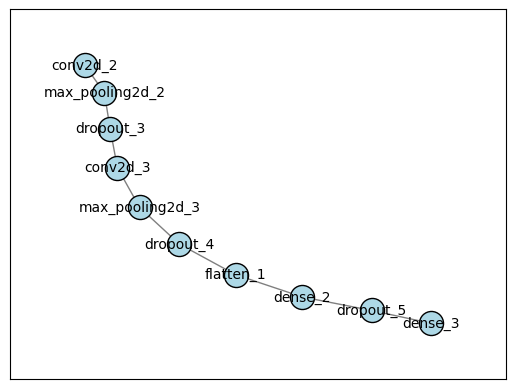

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add input layer separately
input_layer = model2.layers[0]
G.add_node(input_layer.name)

# Add the remaining layers
for layer in model2.layers[1:]:
    G.add_node(layer.name)

# Add edges between layers
for layer in model2.layers[1:]:
    inbound_layers = layer._inbound_nodes[0].inbound_layers
    if isinstance(inbound_layers, list):
        for inbound_layer in inbound_layers:
            G.add_edge(inbound_layer.name, layer.name)
    else:
        G.add_edge(inbound_layers.name, layer.name)

# Customize node and edge colors
node_color = 'lightblue'
edge_color = 'gray'

# Set node positions using a spring layout
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_color, edgecolors='black')
nx.draw_networkx_edges(G, pos, edge_color=edge_color)

# Add node labels
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Adjust plot margins
ax = plt.gca()
ax.margins(0.15)

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         